In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset
  * see [this link](http://yann.lecun.com/exdb/mnist/)

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

In [3]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

NameError: name 'plt' is not defined

### Preprocessing

In [178]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [1]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

Using TensorFlow backend.


NameError: name 'y_train' is not defined

### Define Sigmoid

0.000123394575986
0.5
0.999876605424


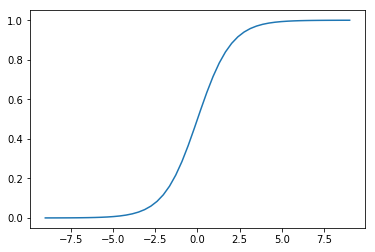

In [7]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

### Multi-layer Neural Network

- 이미지 셋 느리다. 수렴이 안된다.
    - 웨이트 초기화, 러닝 레이트
    - +bias 추가
    - Hidden layer 를 두개와 세개로 추가

#### One Hidden Layer

In [209]:
w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 100
learning_rate = 0.000001

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    
    predict = a2.argmax(axis=1)
    error = (predict != y_train).mean()
    
    if error < 0.05:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        print("w1(mean) = {0:.5f} w1(std) = {1:.5f}".format(w1.mean(), w1.std()))
        print("w2(mean) = {0:.5f} w2(std) = {1:.5f}".format(w2.mean(), w2.std()))
        print("b1(mean) = {0:.5f} b1(std) = {1:.5f}".format(b1.mean(), b1.std()))
        print("b2(mean) = {0:.5f} b2(std) = {1:.5f}".format(b2.mean(), b2.std()))
    
    # Backpropagation
    d2 = a2 - y_train_hot
    d1 = (d2.dot(w2.T) * a1 * (1 - a1))
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)
    
print("---" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.91558
w1(mean) = -0.00006 w1(std) = 0.03349
w2(mean) = 0.00001 w2(std) = 0.04439
b1(mean) = 0.00000 b1(std) = 0.00000
b2(mean) = 0.00000 b2(std) = 0.00000
10 error = 0.19812
w1(mean) = -0.00029 w1(std) = 0.03351
w2(mean) = -0.00376 w2(std) = 0.04439
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
20 error = 0.14410
w1(mean) = -0.00026 w1(std) = 0.03351
w2(mean) = -0.00440 w2(std) = 0.04539
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
30 error = 0.12360
w1(mean) = -0.00025 w1(std) = 0.03351
w2(mean) = -0.00485 w2(std) = 0.04628
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
40 error = 0.11083
w1(mean) = -0.00024 w1(std) = 0.03351
w2(mean) = -0.00520 w2(std) = 0.04708
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000


KeyboardInterrupt: 

### 2 hidden layer

In [ ]:
w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.055, high=+0.055, size=(1000, 1000))
w3 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 1000))
b3 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 1000
learning_rate = 0.000001

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)
    
    predict = a3.argmax(axis=1)
    error = (predict != y_train).mean()
    
    if error < 0.05:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        print("w1(mean) = {0:.5f} w1(std) = {1:.5f}".format(w1.mean(), w1.std()))
        print("w2(mean) = {0:.5f} w2(std) = {1:.5f}".format(w2.mean(), w2.std()))
        print("w3(mean) = {0:.5f} w3(std) = {1:.5f}".format(w3.mean(), w3.std()))
        print("b1(mean) = {0:.5f} b1(std) = {1:.5f}".format(b1.mean(), b1.std()))
        print("b2(mean) = {0:.5f} b2(std) = {1:.5f}".format(b2.mean(), b2.std()))
        print("b3(mean) = {0:.5f} b3(std) = {1:.5f}".format(b3.mean(), b3.std()))
    
    # Backpropagation
    d3 = a3 - y_train_hot
    d2 = (d3.dot(w3.T) * a2 * (1 - a2))
    d1 = (d2.dot(w2.T) * a1 * (1 - a1))
    
    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

    b3 = b3 - learning_rate * d3.mean(axis=0)
    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)
    
print("---" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.90102
w1(mean) = -0.00001 w1(std) = 0.03348
w2(mean) = 0.00007 w2(std) = 0.03178
w3(mean) = 0.00021 w3(std) = 0.04419
b1(mean) = 0.00000 b1(std) = 0.00000
b2(mean) = 0.00000 b2(std) = 0.00000
b3(mean) = 0.00000 b3(std) = 0.00000
10 error = 0.39200
w1(mean) = -0.00005 w1(std) = 0.03348
w2(mean) = -0.00016 w2(std) = 0.03178
w3(mean) = -0.00394 w3(std) = 0.04407
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
20 error = 0.27858
w1(mean) = -0.00005 w1(std) = 0.03348
w2(mean) = -0.00015 w2(std) = 0.03179
w3(mean) = -0.00405 w3(std) = 0.04470
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
30 error = 0.23153
w1(mean) = -0.00005 w1(std) = 0.03348
w2(mean) = -0.00014 w2(std) = 0.03180
w3(mean) = -0.00422 w3(std) = 0.04559
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
40 error = 0.2054